In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline

In [12]:
df = pd.read_csv('./data/ch4_scores400.csv')
scores =np.array(df['score'])
df.info

<bound method DataFrame.info of      score
0       76
1       55
2       80
3       80
4       74
..     ...
395     77
396     60
397     83
398     80
399     85

[400 rows x 1 columns]>

In [9]:
np.random.choice([1,2,3],3)

array([3, 3, 2])

In [10]:
np.random.choice([1,2,3],3,replace=False)

array([1, 3, 2])

In [11]:
np.random.seed(0)
np.random.choice([1,2,3],3)

array([1, 2, 1])

In [15]:
np.random.seed(0)
sample = np.random.choice(scores,20)
print(sample)
print(sample.mean())

[49 60 72 86 52 61 77 91 80 56 69 67 90 56 75 79 60 79 68 81]
70.4


In [14]:
scores.mean()

69.53

In [25]:
score_m = []

for i in range(5):
    sample = np.random.choice(scores,20)
    print(f'{i+1}번째 무작위 추출로 얻은 표본평균',sample.mean())
    score_m.append(sample.mean())

np.array(score_m).mean()

1번째 무작위 추출로 얻은 표본평균 69.5
2번째 무작위 추출로 얻은 표본평균 71.35
3번째 무작위 추출로 얻은 표본평균 69.4
4번째 무작위 추출로 얻은 표본평균 71.5
5번째 무작위 추출로 얻은 표본평균 70.65


70.47999999999999

# 확률 모델

## 확률의 기본

### 확률분포

In [21]:
dice = [1,2,3,4,5,6]
prob = [1/21, 2/21, 3/21, 4/21, 5/21, 6/21]

In [27]:
np.random.choice(dice, p=prob)

6

In [28]:
num_trial = 100
sample=np.random.choice(dice, num_trial, p=prob)
sample

array([3, 5, 3, 1, 6, 4, 4, 5, 6, 5, 6, 3, 6, 3, 6, 5, 3, 6, 6, 3, 3, 5,
       1, 3, 4, 4, 4, 3, 5, 6, 2, 5, 2, 6, 4, 5, 3, 3, 5, 4, 6, 6, 6, 6,
       2, 5, 5, 6, 4, 3, 2, 1, 6, 5, 6, 3, 5, 2, 5, 6, 6, 4, 6, 3, 6, 6,
       6, 5, 6, 4, 6, 5, 1, 4, 3, 6, 5, 5, 5, 4, 2, 6, 3, 5, 3, 2, 6, 6,
       6, 6, 6, 4, 2, 4, 3, 2, 2, 6, 1, 6])

In [31]:
freq, _=np.histogram(sample, bins=6, range=(1,7))
pd.DataFrame({'frequency':freq,
             'relative frequency': freq / num_trial},
            index=pd.Index(np.arange(1,7), name='dice'))

,frequency,relative frequency
dice,,
1,5,0.05
2,10,0.10
3,18,0.18
4,14,0.14
5,20,0.20
6,33,0.33


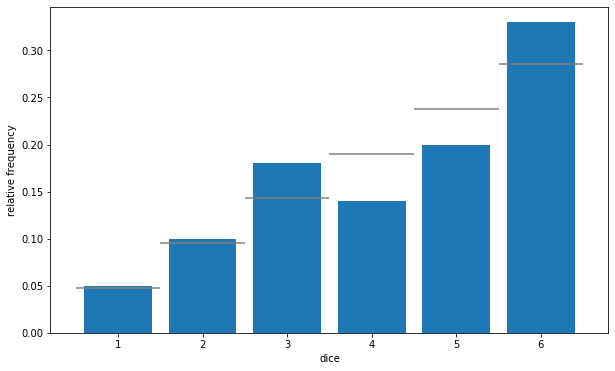

In [32]:
fig=plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=6, range=(1,7), density=True, rwidth=0.8)
ax.hlines(prob, np.arange(1,7),np.arange(2,8),colors='gray')
ax.set_xticks(np.linspace(1.5,6.5,6))
ax.set_xticklabels(np.arange(1,7))
ax.set_xlabel('dice')
ax.set_ylabel('relative frequency')
plt.show()


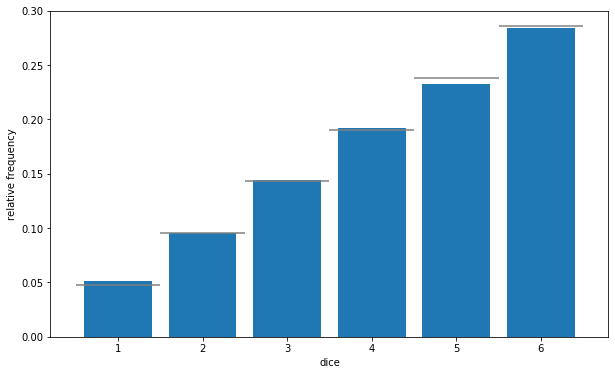

In [33]:
num_trial = 10000
sample = np.random.choice(dice, size=num_trial, p=prob)

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=6, range=(1,7), density=True, rwidth=0.8)
ax.hlines(prob, np.arange(1,7),np.arange(2,8),colors='gray')
ax.set_xticks(np.linspace(1.5,6.5,6))
ax.set_xticklabels(np.arange(1,7))
ax.set_xlabel('dice')
ax.set_ylabel('relative frequency')
plt.show()


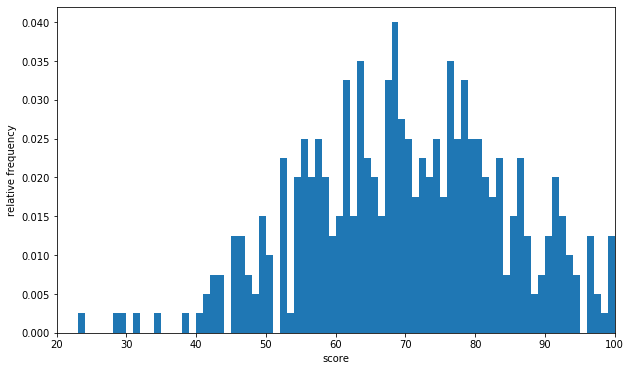

In [34]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.hist(scores, bins=100, range=(0,100), density=True)
ax.set_xlim(20,100)
ax.set_ylim(0, 0.042)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()

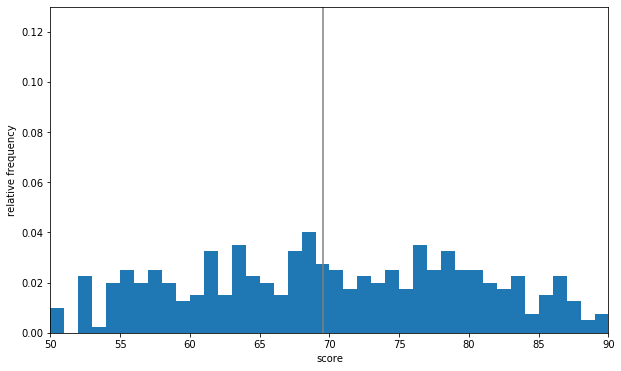

In [41]:
sample_means = [np.random.choice(scores,20).mean()
               for _ in range(10000)]

fig=plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.hist(scores, bins=100, range=(0,100), density=True)
ax.vlines(np.mean(scores),0,1,'gray')
ax.set_xlim(50,90)
ax.set_ylim(0, 0.13)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()